In [37]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import keras
from keras import backend as k
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import pyplot
print(tf.__version__)
print(keras.__version__)

2.2.0
2.3.1


In [38]:
from keras.datasets import cifar10
import os
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [39]:
print('Train Samples:', x_train.shape, y_train.shape)
print('Test Sample:', x_test.shape, y_test.shape)

Train Samples: (50000, 32, 32, 3) (50000, 1)
Test Sample: (10000, 32, 32, 3) (10000, 1)


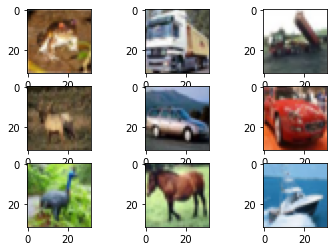

In [40]:
#plot some images
for i in range (9):
  pyplot.subplot(330 + 1 + i) #define subplot
  pyplot.imshow(x_train[i]) #plot raw pixel data
pyplot.show ()

In [41]:
num_classes = 10
cifar10_class = ['airplane', 'automobile','bird','cat','deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [42]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [43]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout
from keras.layers.advanced_activations import LeakyReLU

In [44]:
 
# Build Model
model = keras.models.Sequential()
# 1st Conv block
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=x_train.shape[1:]))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
# 2nd Conv block
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
# Fully-Connected layer
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
 
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 12, 12, 64)        18496     
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 10, 10, 64)        36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 5, 5, 64)         

In [45]:
# Compile Model
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [46]:
# Data Generator
# This will do preprocessing and realtime data augmentation:
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    zca_epsilon=1e-06,  # epsilon for ZCA whitening
    rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
    # randomly shift images horizontally (fraction of total width)
    width_shift_range=0.1,
    # randomly shift images vertically (fraction of total height)
    height_shift_range=0.1,
    shear_range=0.,  # set range for random shear
    zoom_range=0.,  # set range for random zoom
    channel_shift_range=0.,  # set range for random channel shifts
    # set mode for filling points outside the input boundaries
    fill_mode='nearest',
    cval=0.,  # value used for fill_mode = "constant"
    horizontal_flip=True,  # randomly flip images
    vertical_flip=False,  # randomly flip images
    # set rescaling factor (applied before any other transformation)
    rescale=None,
    # set function that will be applied on each input
    preprocessing_function=None,
    # image data format, either "channels_first" or "channels_last"
    data_format=None,
    # fraction of images reserved for validation (strictly between 0 and 1)
    validation_split=0.0)

In [47]:
# Compute quantities required for feature-wise normalization
# (std, mean, and principal components if ZCA whitening is applied).
datagen.fit(x_train)

In [48]:
batch_size = 32
# Train Model 
num_epochs=15
history = model.fit_generator(datagen.flow(x_train, y_train, batch_size=batch_size), epochs=num_epochs, validation_data=(x_test, y_test))

Epoch 1/15
1563/1563 [==============================] - 207s 132ms/step - loss: 1.6424 - accuracy: 0.3949 - val_loss: 1.3137 - val_accuracy: 0.5216
Epoch 2/15
1563/1563 [==============================] - 206s 132ms/step - loss: 1.3182 - accuracy: 0.5236 - val_loss: 1.0928 - val_accuracy: 0.6080
Epoch 3/15
1563/1563 [==============================] - 205s 131ms/step - loss: 1.1797 - accuracy: 0.5773 - val_loss: 0.9787 - val_accuracy: 0.6431
Epoch 4/15
1563/1563 [==============================] - 203s 130ms/step - loss: 1.0919 - accuracy: 0.6114 - val_loss: 0.9111 - val_accuracy: 0.6769
Epoch 5/15
1563/1563 [==============================] - 206s 132ms/step - loss: 1.0304 - accuracy: 0.6347 - val_loss: 0.8584 - val_accuracy: 0.7004
Epoch 6/15
1563/1563 [==============================] - 202s 129ms/step - loss: 0.9909 - accuracy: 0.6514 - val_loss: 0.8898 - val_accuracy: 0.6878
Epoch 7/15
1563/1563 [==============================] - 203s 130ms/step - loss: 0.9571 - accuracy: 0.6637 - val_

In [49]:

score = model.evaluate(x_test, y_test, verbose=0) 
print('loss=', score[0]) 
print('accuracy=', score[1]) 


loss= 0.7585212379455566
accuracy= 0.7386000156402588


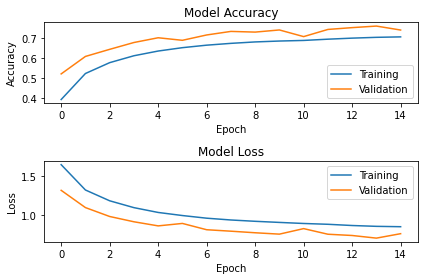

In [50]:

plt.figure(1)
# summarize history for accuracy

plt.subplot(211)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='lower right')

# summarize history for loss

plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')

plt.tight_layout()

plt.show()


0.7386


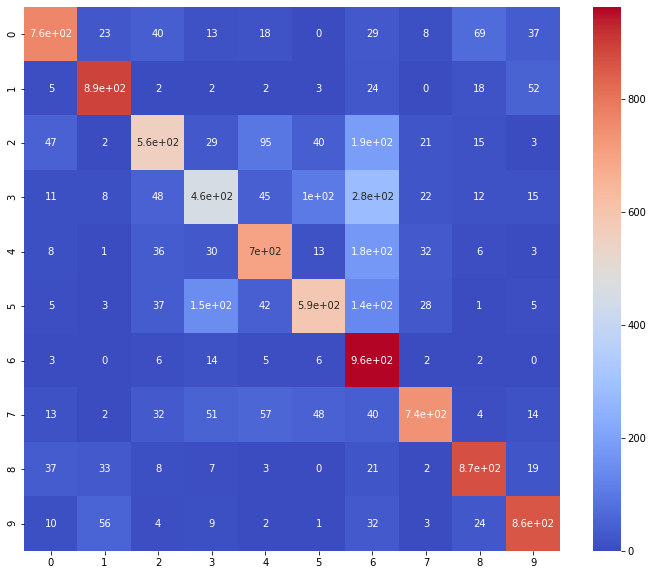

In [51]:
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import classification_report, confusion_matrix, roc_curve 
from sklearn.metrics import roc_auc_score, auc, accuracy_score
import seaborn as sns
y_pred=model.predict(x_test)
y_pred_classe=y_pred.argmax(axis=-1)
y_test_classe=y_test.argmax(axis=-1)
 
print(acc(y_test_classe,y_pred_classe))
 
cm = confusion_matrix(y_test_classe,y_pred_classe)
plt.figure(figsize = (12,10))
sns.heatmap(cm, annot=True, cmap="coolwarm")

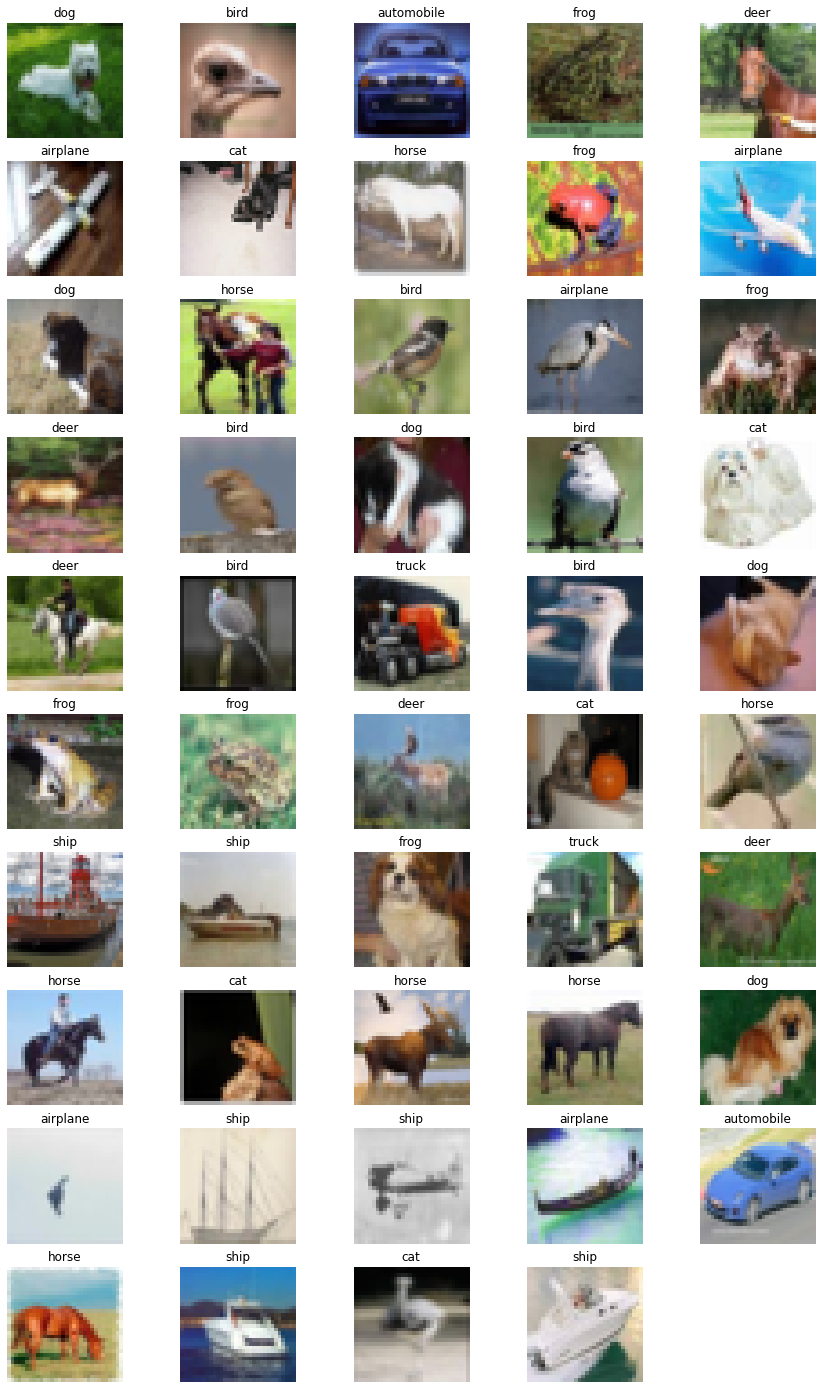

In [52]:

import random
plt.figure(figsize=(15,25))
n_test = x_test.shape[0]
for i in range (1, 50):
  ir = random.randint(0, n_test)
  plt.subplot(10, 5, i)
  plt.axis('off')
  plt.imshow(x_test[ir])
  plt.imshow(x_test[ir])
  pred_classe = y_pred_classe[ir]
  plt.title(cifar10_class[pred_classe])
